In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(42)




In [13]:
df = pd.read_csv('Medical Price Dataset.csv')
print("Dataset Shape:", df.shape)
print("\nFirst few rows of the dataset:")
print(df.head())
print("\nDataset information:")
print(df.info())
print("\nBasic statistics:")
print(df.describe())


Dataset Shape: (1338, 7)

First few rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Basic stati

In [14]:
def preprocess_data(df):
    df_processed = df.copy()
    df_processed['sex'] = df_processed['sex'].map({'female': 0, 'male': 1})
    df_processed['smoker'] = df_processed['smoker'].map({'no': 0, 'yes': 1})
    region_dummies = pd.get_dummies(df_processed['region'], prefix='region')
    df_processed = pd.concat([df_processed, region_dummies], axis=1)
    df_processed = df_processed.drop('region', axis=1)
    return df_processed



Processed training set shape: (1070, 9)
Processed testing set shape: (268, 9)


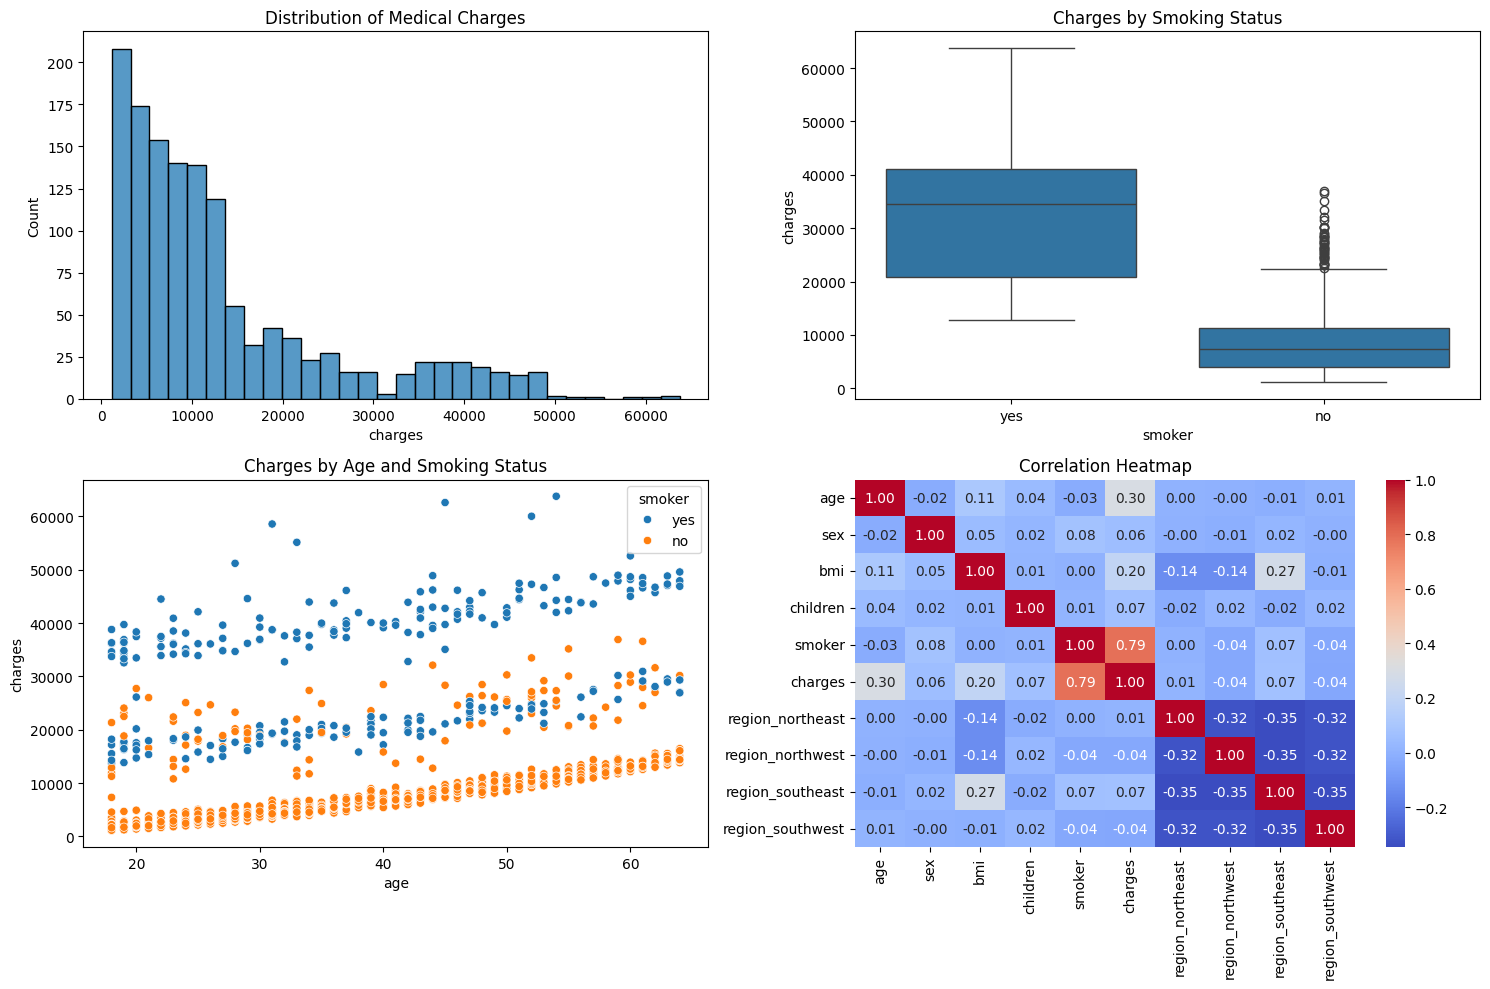

In [15]:
df_processed = preprocess_data(df)

X = df_processed.drop('charges', axis=1)
y = df_processed['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nProcessed training set shape:", X_train_scaled.shape)
print("Processed testing set shape:", X_test_scaled.shape)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(data=df, x='charges', bins=30)
plt.title('Distribution of Medical Charges')

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Charges by Smoking Status')

plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title('Charges by Age and Smoking Status')

plt.subplot(2, 2, 4)
sns.heatmap(df_processed.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()


In [16]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            cost = (1/(2*n_samples)) * np.sum((y_predicted - y) ** 2)
            self.cost_history.append(cost)
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


In [17]:
model = LinearRegression(learning_rate=0.01, n_iterations=1000)
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Metrics:")
print(f"Mean Squared Error: {train_mse:.2f}")
print(f"R2 Score: {train_r2:.4f}")
print("\nTesting Metrics:")
print(f"Mean Squared Error: {test_mse:.2f}")
print(f"R2 Score: {test_r2:.4f}")

Training Metrics:
Mean Squared Error: 37277682.91
R2 Score: 0.7417

Testing Metrics:
Mean Squared Error: 33597609.63
R2 Score: 0.7836


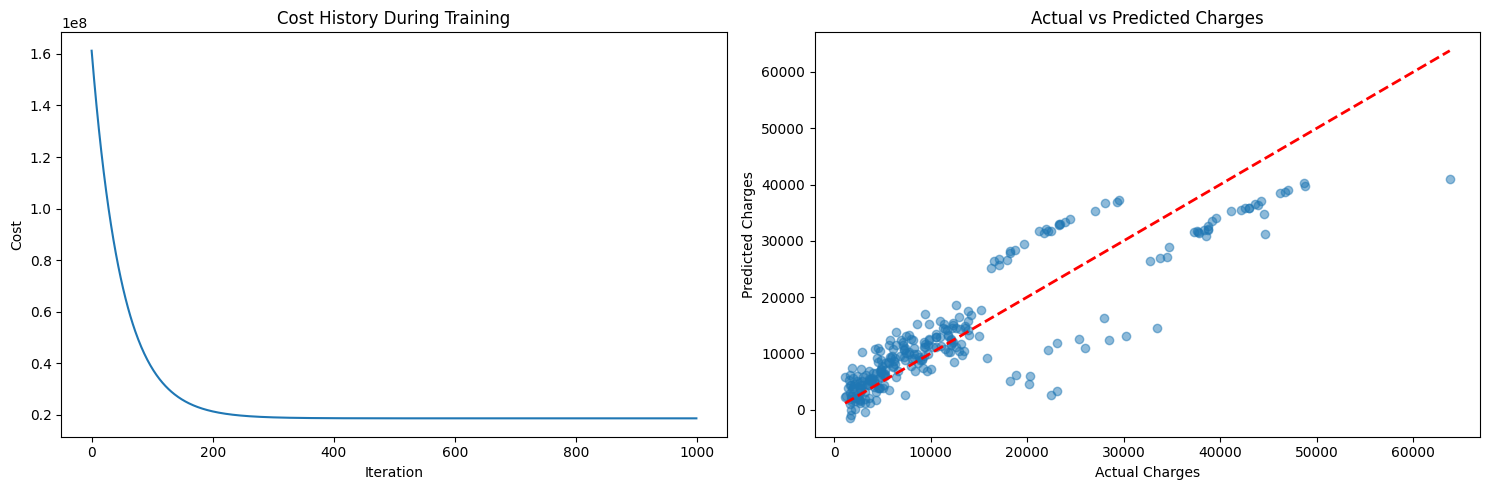

In [18]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(model.cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost History During Training')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')

plt.tight_layout()
plt.show()


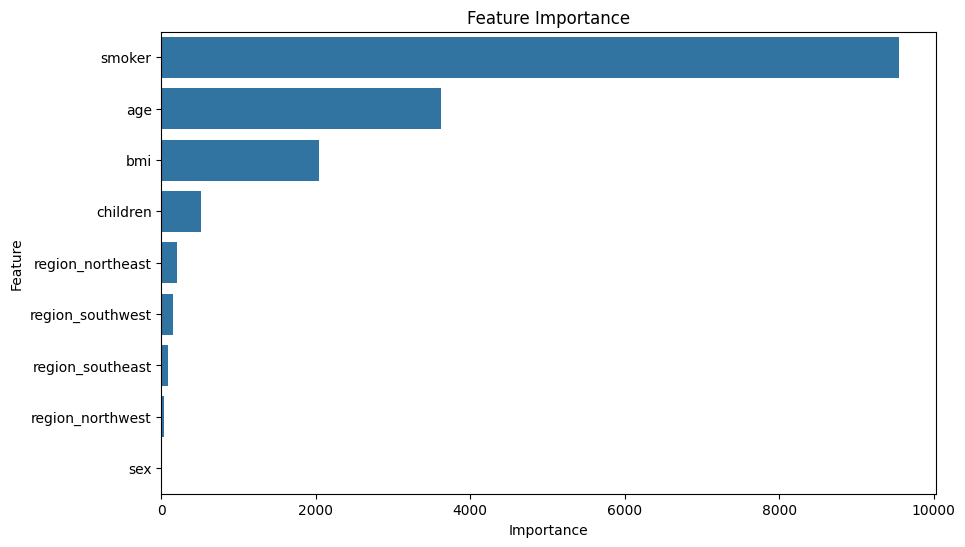

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(model.weights)
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()

In [20]:
print("\nModel Summary:")
print("=" * 50)
print(f"Number of features: {X_train.shape[1]}")
print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of testing samples: {X_test.shape[0]}")
print(f"Learning rate: {model.learning_rate}")
print(f"Number of iterations: {model.n_iterations}")
print("\nFinal Model Performance:")
print(f"Training R2 Score: {train_r2:.4f}")
print(f"Testing R2 Score: {test_r2:.4f}")
print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE: {test_mse:.2f}")


Model Summary:
Number of features: 9
Number of training samples: 1070
Number of testing samples: 268
Learning rate: 0.01
Number of iterations: 1000

Final Model Performance:
Training R2 Score: 0.7417
Testing R2 Score: 0.7836
Training MSE: 37277682.91
Testing MSE: 33597609.63
